In [3]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
 num_words=10000)

In [4]:
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(8982,)
(8982,)
(2246,)
(2246,)


In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
 [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
 [reverse_word_index.get(i - 3, "?") for i in train_data[0]])
decoded_review

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [6]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
 results = np.zeros((len(sequences), dimension))
 for i, sequence in enumerate(sequences):
    for j in sequence:
        results[i, j] = 1.
 return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
import numpy as np
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [8]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8982, 10000)
(2246, 10000)
(8982,)
(2246,)


In [9]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
 layers.Dense(64, activation="relu"),
 layers.Dense(64, activation="relu"),
 layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
 loss="sparse_categorical_crossentropy",
 metrics=["accuracy"])


In [10]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [17]:
x_val.shape

(1000, 10000)

In [12]:
partial_y_train.shape

(7982,)

In [18]:
history = model.fit(x_train,
y_train,
epochs=20,
batch_size=512,
validation_data=(x_test, y_test))

Epoch 1/20
18/18 [==============================] - 1s 73ms/step - loss: 0.2278 - accuracy: 0.9431 - val_loss: 0.9936 - val_accuracy: 0.7961
Epoch 2/20
18/18 [==============================] - 1s 56ms/step - loss: 0.1820 - accuracy: 0.9464 - val_loss: 0.9944 - val_accuracy: 0.7961
Epoch 3/20
18/18 [==============================] - 1s 53ms/step - loss: 0.1625 - accuracy: 0.9493 - val_loss: 0.9759 - val_accuracy: 0.7996
Epoch 4/20
18/18 [==============================] - 1s 41ms/step - loss: 0.1551 - accuracy: 0.9512 - val_loss: 1.0337 - val_accuracy: 0.7930
Epoch 5/20
18/18 [==============================] - 1s 42ms/step - loss: 0.1438 - accuracy: 0.9516 - val_loss: 1.0166 - val_accuracy: 0.7970
Epoch 6/20
18/18 [==============================] - 1s 44ms/step - loss: 0.1343 - accuracy: 0.9542 - val_loss: 1.0124 - val_accuracy: 0.8001
Epoch 7/20
18/18 [==============================] - 1s 48ms/step - loss: 0.1288 - accuracy: 0.9552 - val_loss: 1.0246 - val_accuracy: 0.8032
Epoch 8/20
18

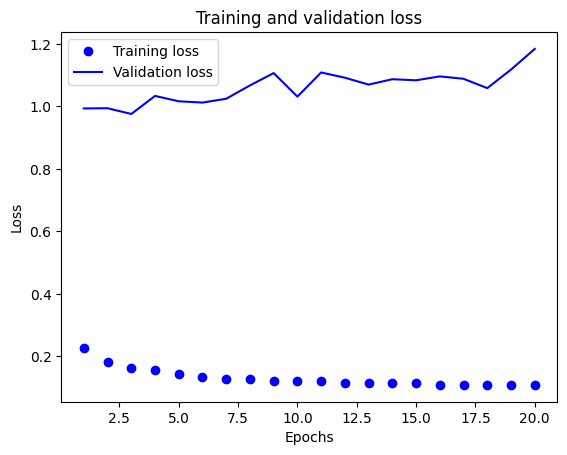

In [19]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [16]:
results = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 1.0259 - accuracy: 0.7894


In [15]:
results

[1.0790640115737915, 0.7867319583892822]